In this dataset we are trying to predict whether a person has a credit card or not based on the given information.

In [388]:
import numpy as np
import pandas as pd
from sklearn import naive_bayes as nb
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [389]:
loc='C:/Users/Asus/Downloads/'
data=pd.read_excel(loc+'data.xlsx',sheet_name='Data')
des=pd.read_excel(loc+'data.xlsx',sheet_name='Description',skiprows=6,usecols=[1,2],names=['Feature','Description'])
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Description of every feature taken in account in the dataset

In [390]:
des

,Feature,Description
0,ID,Customer ID
1,Age,Customer's age in completed years
2,Experience,#years of professional experience
3,Income,Annual income of the customer ($000)
4,ZIPCode,Home Address ZIP code.
5,Family,Family size of the customer
6,CCAvg,Avg. spending on credit cards per month ($000)
7,Education,Education Level. 1: Undergrad; 2: Graduate; 3:...
8,Mortgage,Value of house mortgage if any. ($000)
9,Personal Loan,Did this customer accept the personal loan off...


In [391]:
x=data.drop(['ID','ZIP Code','CreditCard'],axis=1)
y=data[['CreditCard']]

### Visualizing dataset

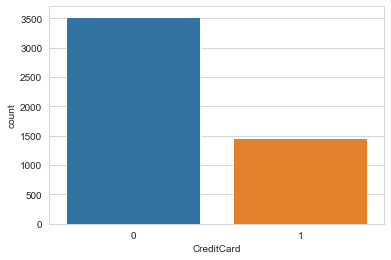

In [392]:
sns.set_style('whitegrid')
sns.countplot(x='CreditCard',data=data,orient='h')
plt.show()

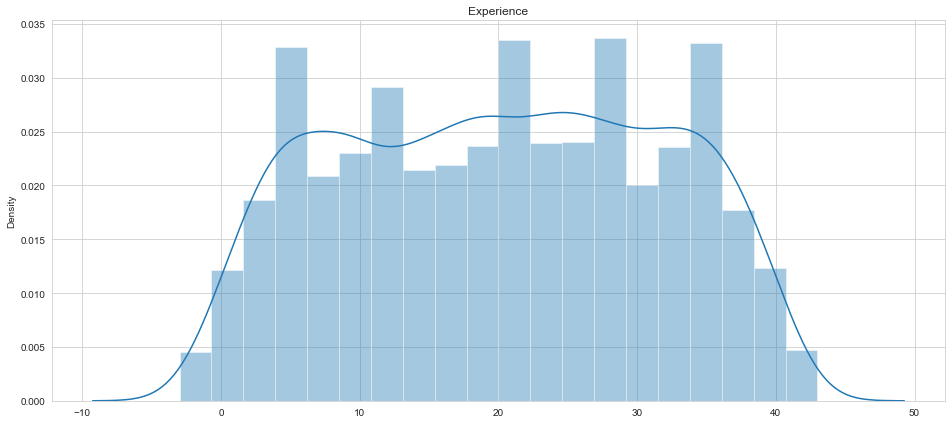

In [393]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,7))
sns.distplot(x=data['Experience'])
plt.title('Experience')
plt.show()

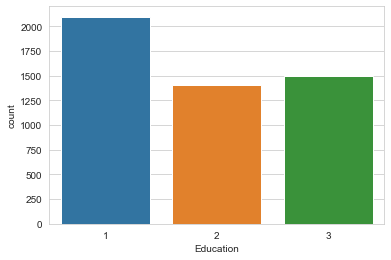

In [394]:
sns.countplot(x='Education',data=data)
plt.show()

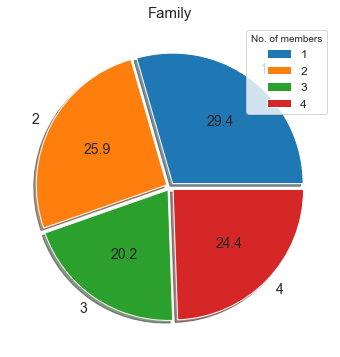

In [395]:
arr=np.unique(data['Family'],return_counts=1)
plt.figure(figsize=(8,6))
plt.pie(arr[1],labels=arr[0], shadow=1,explode=[0.03,0.03,0.03,0.03],autopct='%0.1f',textprops={'fontsize':14})
plt.legend(title='No. of members',prop={'size':12})
plt.title('Family',fontsize=15)
plt.show()

### Modeling

In modeling process we got to use three different models as we intend to use Naive Bayes approach and each model is specific to one case only i.e. Categorical, multinomial and Gaussian. So, we have to develop a model containing all the three appcoaches, i.e. it should have a class of three cases which give three probablities for a specific case and working out through each probablity we have to predict a final outcome.

The function model_mix takes the models user wants to fit with data given in the same order as mentioned models and will give a final probablity for each label.

In [397]:
x['Experience']=np.max((np.zeros(5000),x['Experience'].values),axis=0)

x_cat=x[['Education','Family','Personal Loan','Securities Account','CD Account','Online','Age','Experience']]
x_gaus=x[['Income','CCAvg','Mortgage']]
x_data=(x_cat,x_multi,x_gaus)

In [398]:
class model_mix:
    
    def __init__(self,models):
        
        self.n=len(models)
        self.model_1=eval(f'nb.{models[0].capitalize()}NB()')
        self.model_2=eval(f'nb.{models[1].capitalize()}NB()')
        if self.n==3:
            self.model_3=eval(f'nb.{models[2].capitalize()}NB()')
            
    def fit(self,x,y):
        
        self.model_1.fit(x[0],y)
        self.model_2.fit(x[1],y)
        if self.n==3:
            self.model_3.fit(x[2],y)
    
    def predict(self,array):
        proba=np.zeros((3,len(self.model_1.classes_)))
        for i in range(self.n):
            proba[i,:]=eval(f'self.model_{i+1}').predict_log_proba(array[i].values.reshape(1,-1))
            
        final=np.sum(proba,axis=0)
        return(np.argmax(final))

In [399]:
clf=model_mix(models=['categorical','Gaussian'])
clf.fit(x_data,y)
y_hat=np.zeros(5000)
for i in range(len(data)):
    y_hat[i]=clf.predict((x_cat.iloc[i],x_multi.iloc[i],x_gaus.iloc[i]))

In [402]:
score=1-np.sum(np.not_equal(y.values,y_hat.reshape(-1,1)))/5000
print('score: %.2f'%(score*100))

score: 73.84


### Results

For this dataset the classifier is fine but not upto the mark as the data itself was skewed having more number for credit card owners and only a few does'nt. But still efficiency of 73.8 % is quite fine.

In [401]:
np.unique(y_hat, return_counts=1)

(array([0., 1.]), array([4728,  272], dtype=int64))